# Lezione 09

L'obiettivo di questa lezione consiste nel risolvere il traveling salesman problem con un algoritmo genetico.

Con il programma city.cpp vengono generate due configurazioni di 30 città:
1. le città sono distribuite uniformemente in un quadrato di lato $\sqrt{30}$ (coordinate nel file square.dat);
2. le città sono distribuite uniformemente su una criconferenza di raggio $\sqrt{30}$ (coordinate nel file  circumference.dat). 

## Funzioni loss e fitness

Nel codice viene utilizzata una poplazione di 500 cromosomi ciascuno contenente la sequenza in cui vengono visitate le città, una variabile $l$ funzione crescente della lunghezza del percorso e un fitness che rappresenta la probabilità che il cromosoma venga scelto per creare i cromosomi della generazione successiva.

Per calcolare $l$ ho utilizzato le loss functions:
- $L^{(1)}(\vec{x}_1, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|$,
- $L^{(2)}(\vec{x}_1, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2$,

con $\{ \vec{x}_1,\dots, \vec{x}_N\} $ coordinate delle città nell'ordine in cui vengono visitate. 

Per calcolare il fitness ho utilizzato le funzioni:
- $f_1(l)=-l + 1.1 l_{\text{max}}$, 
- $f_2(l)=e^{-l/10} - 0.5e^{-l_{\text{max}}/10}$,

dove $l_{\text{max}}$ è la lunghezza massima nella popolazione di cromosomi.

Una volta normalizzati i fitness troviamo che la funzione $f_2$ attribuisce un maggiore fitness ai cromosomi di bassa $l$ rispetto a $f_1$. Quindi usando $f_2$ abbiamo una maggiore probabilità che i genitori della nuova generazione abbiamo $l$ piccola e quindi che questa caratteristica venga ereditata dalla nuova generazione. 
Ciò produce un'ottimizzazione più efficace. 

Nelle figure seguenti viene messo a confronto l'andamento di $l_{\text{min}}$ (la $l$ minima della popolazione) con il numero di generazioni nel caso di $f_1$ e di $f_2$. 

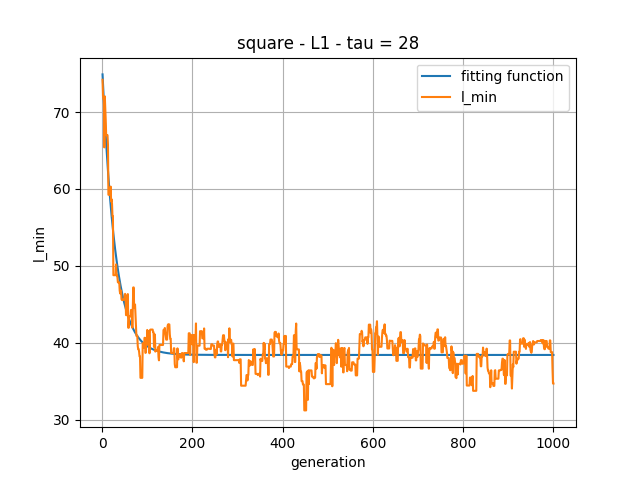

In [6]:
# FITNESS LINEARE 

from IPython.display import Image
i = Image(filename = '9_lin.png') 
i

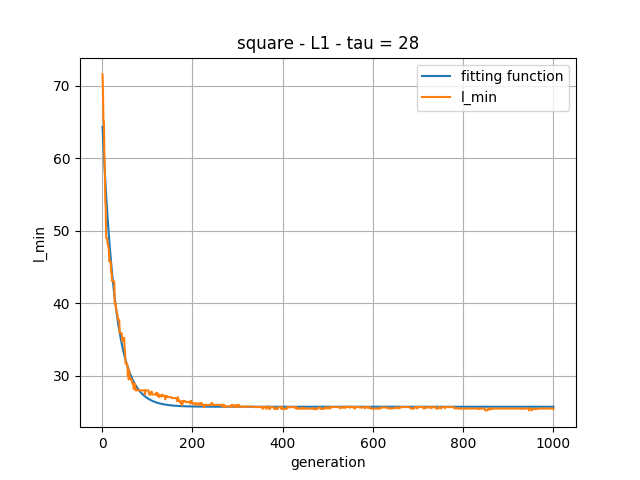

In [7]:
#FITNESS ESPONENZIALE

from IPython.display import Image
i = Image(filename = '9_exp.png') 
i

In questi esempi ho usato la loss $L^{(1)}$ e le città nel quadrato.
Notiamo che nel secondo caso (fitness esponenziale), l'andamento di $l_{\text{min}}$ è più regolare e la $l_{\text{min}}$ si stabilizza su un valore più piccolo rispetto al caso del fitness lineare.
Risultati analoghi si osservano con $L^{(2)}$ e con le città sulla circonferenza, pertanto nelle simulazioni successive faremo uso di $f_2$ per il calcolo del fitness. 


## Città nel quadrato

Consideriamo la configurazione di città nel quadrato. Vogliamo studiare l'andamento di $l_{\text{min}}$ e di $ \langle l \rangle$ (media di $l$ sulla metà popolazione con $l$ più basso) con il numero di generazioni.

### L1

Nella figura seguente sono mostrati tali andamenti utilizzando la loss $L^{(1)}$. Sono presenti anche dei fit degli andamenti con una funzione $ae^{-t/\tau}+b$.


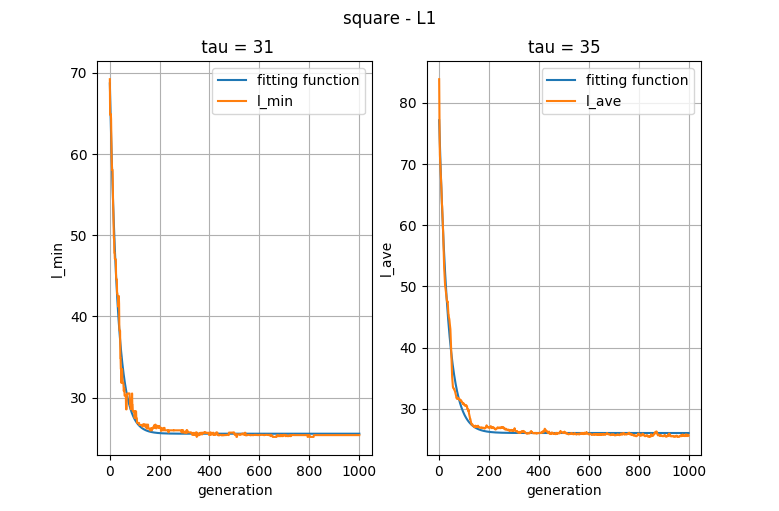

In [9]:
#SQUARE - L1

from IPython.display import Image
i = Image(filename = '9_sq1.png') 
i

E ora un'immagine del percorso finale, risultato dell'ottimizzazione:

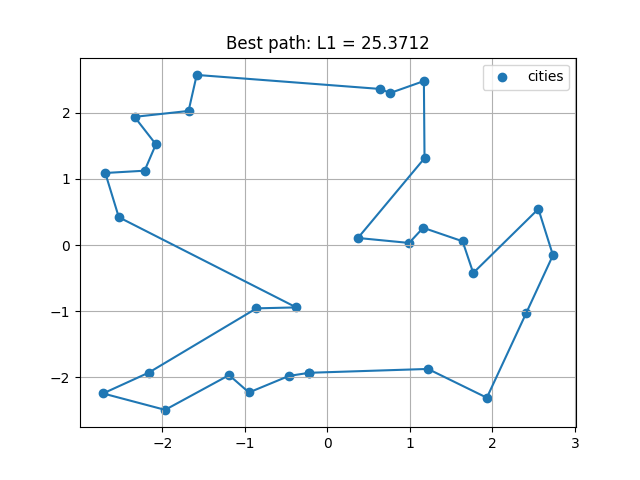

In [12]:
#PATH - L1

from IPython.display import Image
i = Image(filename = '9_psq1.png') 
i

### L2
Nella figura seguente sono rappresentati gli andamenti con $L^{(2)}$.

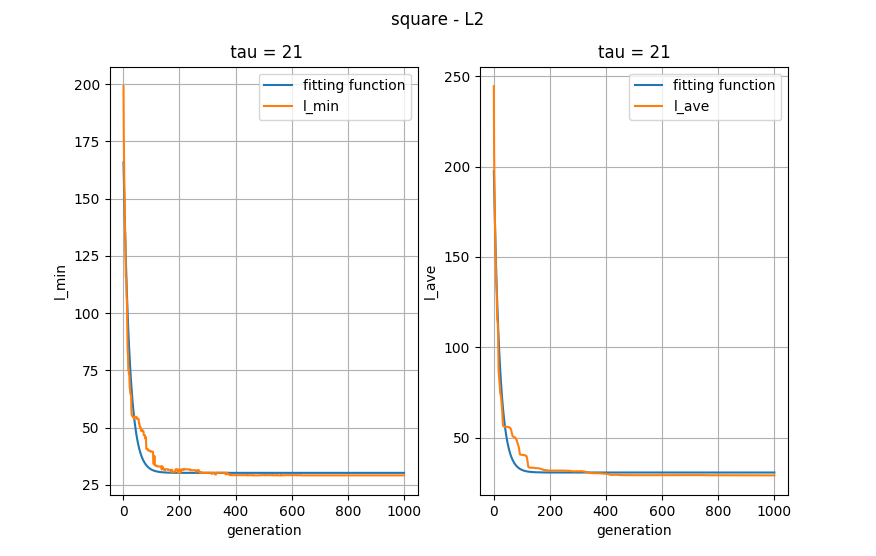

In [11]:
#SQUARE - L2

from IPython.display import Image
i = Image(filename = '9_sq2.png') 
i

e ora il percorso migliore:

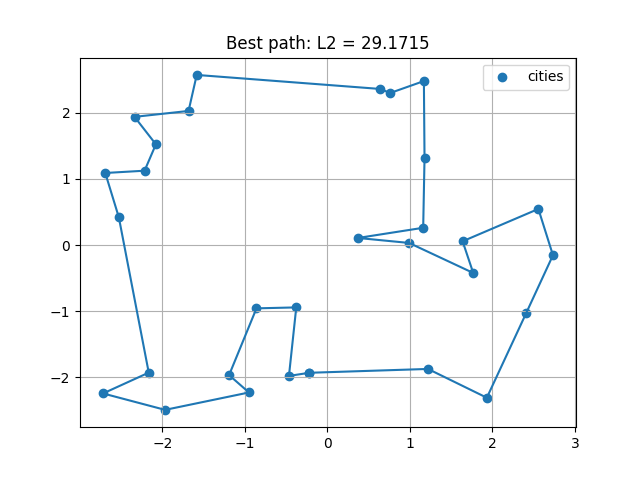

In [14]:
#PATH - L2

from IPython.display import Image
i = Image(filename = '9_psq2.png') 
i

## Città sulla circonferenza

Di seguito vengono riportati gli stessi grafici nel caso di città su circonferenza.

### L1

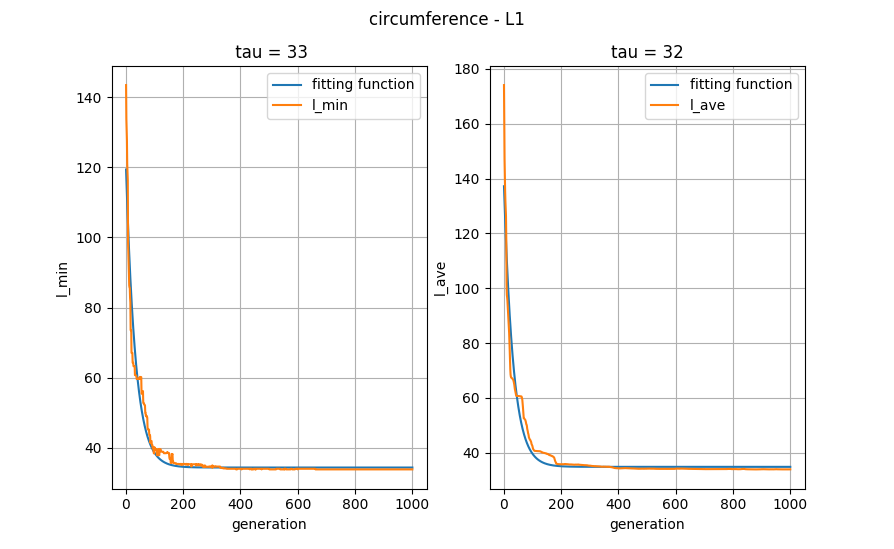

In [18]:
#CIRCUMFERENCE - L1

from IPython.display import Image
i = Image(filename = '9_ci1.png') 
i

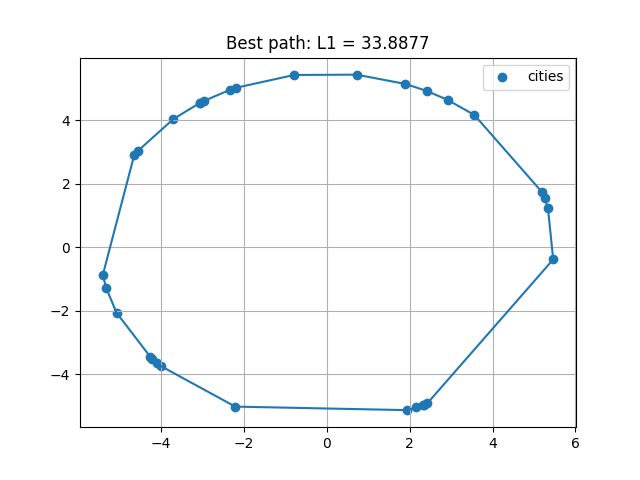

In [19]:
#PATH - L1

from IPython.display import Image
i = Image(filename = '9_pci1.png') 
i

### L2

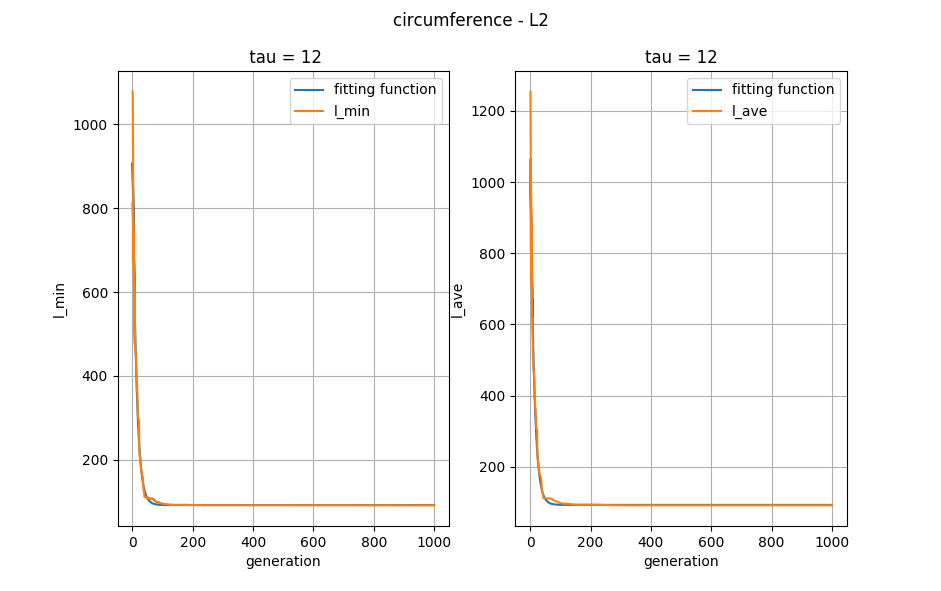

In [20]:
# CIRCUMFERENCE - L2

from IPython.display import Image
i = Image(filename = '9_ci2.png') 
i

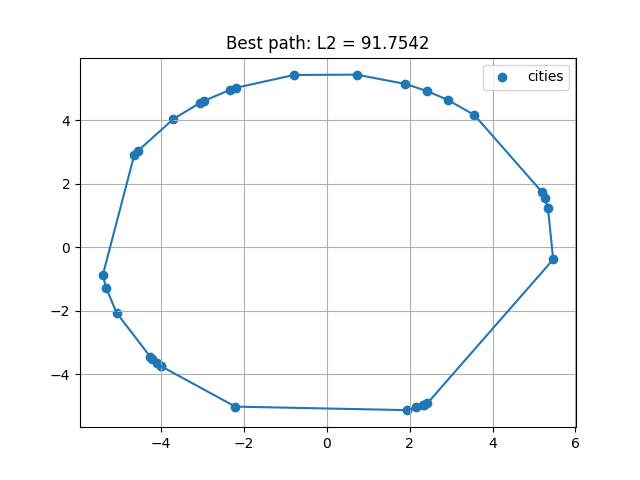

In [22]:
# PATH- L2

from IPython.display import Image
i = Image(filename = '9_pci2.png') 
i

## Osservazioni

Sia per le città nel quadrato che sulla circonferenza osservo che il tempo scala $\tau$ dell'ottimizzazione è più breve nelle simulazioni in cui uso $L^{(2)}$. Per assicurarmi che questo fatto non sia un caso ho calcolato le medie $\langle \tau \rangle _{L^{(2)}}$ e $\langle \tau \rangle _{L^{(1)}}$ di $\tau$ su 100 simulazioni usando rispettivamente $L^{(2)}$ e $L^{(1)}$. Ho trovato i seguenti risultati:
- cricumference: $\langle \tau \rangle _{L^{(2)}}$=10.47, $\langle \tau \rangle _{L^{(1)}}$=36.76, 
- square: $\langle \tau \rangle _{L^{(2)}}$=22.99, $\langle \tau \rangle _{L^{(1)}}$= 40.74.

Per calcolare la media ho lanciato la simulazione 100 volte con manysim.sh. Tuttavia nel caso di $\langle \tau \rangle _{L^{(2)}}$ sono stati raccolti meno valori di $\tau$ perchè alcune simualzioni si interrompevano prima di giungere al termine, stampando il messaggio di errore che viene lanciato quando il programma non riesce a selezionare due cromosomi genitori diversi. Ciò è accaduto 31 vole per le città sulla circonferenza e 4 volte per città nel quadrato.

Ho interpretato questo fatto e l'osservazione che $\langle \tau \rangle _{L^{(2)}}<\langle \tau \rangle _{L^{(1)}}$ nel modo seguente: 
dati due percorsi con cui vengono visitate le città, la differenza tra le rispettive lunghezze $l$ è maggiore se calcolata con $L^{(2)}$ piuttosto che con $L^{(1)}$. Pertanto utilizzando $L^{(2)}$ ci sono maggiori differenze tra gli $l$ della popolazione e queste differenze vengono amplificate nei fitness calcolati con $f_2$.
Dunque nel caso $L^{(2)}$ è più probabile che accada che ci sia un cromosoma con fitness $\sim 1$ e tutti gli altri con fitness $\sim 0$ e che quindi il programma non riesca a selezionare cromosomi genitori differenti. 
Analogamente con molta disparità tra i fitness è più probabile che vengano scelti solo quelli di fitness maggiore
 per generare i figli e che quindi l'ottimizzazione si focalizzi sempre sui cromosomi "migliori" più di quanto accada nel caso $L^{(1)}$ ottenendo così un'ottimizzazione più rapida, ciò spiegherebbe l'osservazione $\langle \tau \rangle _{L^{(2)}}<\langle \tau \rangle _{L^{(1)}}$

